In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 가져오기

In [2]:
old_people_population = pd.read_csv('고령화.txt',sep ='\t')
silver_zone = pd.read_csv('전국노인장애인보호구역표준데이터.csv',encoding = 'cp949')
young_zone = pd.read_csv('전국어린이보호구역표준데이터.csv', encoding = 'cp949')
old_welfare = pd.read_csv('노인여가복지시설.txt',sep ='\t')
old_nursing = pd.read_csv('서울특별시 노인요양시설 정보_20180821 (1).csv', encoding='cp949')
young_nursery = pd.read_csv('어린이보육시설.txt',sep = '\t')

## 노인 인구 데이터 전처리

In [3]:
#데이터 확인
# old_people_population.head(5)
# 데이터 정리 - 전체인구+65세이상인구 칼럼만 사용
old_people_population = old_people_population.drop([0,1,2]).reset_index()
old_people_population = old_people_population[old_people_population['동'] == '소계']
old_people_population = old_people_population[['자치구','전체인구','65세이상 인구']]

In [4]:
#str데이터 int로 바꿔주기
old_people_population['전체인구'] = old_people_population['전체인구'].str.replace(',','')
old_people_population['65세이상 인구'] = old_people_population['65세이상 인구'].str.replace(',','')
old_people_population = old_people_population.astype({'전체인구':int,'65세이상 인구':int})

In [5]:
old_people_population.dtypes

자치구         object
전체인구         int32
65세이상 인구     int32
dtype: object

In [6]:
# 노인인구 비율 칼럼 추가
old_people_population['노인비율'] = old_people_population['65세이상 인구']/old_people_population['전체인구']

### 전체인구 vs 노인인구

In [7]:
# 2019년 전체 인구
total_population_2019 = old_people_population.groupby('자치구').sum()[['전체인구','65세이상 인구']].sum()
total_population_2019

전체인구        10010983
65세이상 인구     1485272
dtype: int64

In [8]:
# 2019년 서울시 노인인구 vs 전체인구
old_people_population = old_people_population.set_index('자치구')
old_people_population

,전체인구,65세이상 인구,노인비율
자치구,,,
종로구,161869,27519,0.170008
중구,136488,23275,0.170528
용산구,245185,38791,0.158211
성동구,308979,43947,0.142233
광진구,366972,47902,0.130533
동대문구,363023,59350,0.163488
중랑구,402024,65164,0.162090
성북구,454744,70850,0.155802
강북구,317695,60577,0.190677


In [9]:
old_people_population.sort_values(by=['노인비율'],axis=0,ascending = False)

,전체인구,65세이상 인구,노인비율
자치구,,,
강북구,317695,60577,0.190677
도봉구,335631,58714,0.174936
중구,136488,23275,0.170528
종로구,161869,27519,0.170008
은평구,484546,80738,0.166626
동대문구,363023,59350,0.163488
중랑구,402024,65164,0.162090
서대문구,323171,52074,0.161135
용산구,245185,38791,0.158211


In [10]:
district_old = old_people_population['65세이상 인구']
district_old.sort_values(ascending=False)

자치구
송파구     87334
강서구     84077
노원구     80923
은평구     80738
관악구     75194
강남구     71025
성북구     70850
구로구     65779
중랑구     65164
강동구     63452
동작구     62226
양천구     61264
강북구     60577
동대문구    59350
도봉구     58714
영등포구    57872
서초구     57136
마포구     52429
서대문구    52074
광진구     47902
성동구     43947
용산구     38791
금천구     37660
종로구     27519
중구      23275
Name: 65세이상 인구, dtype: int32

## 노인보호구역, 어린이구역 데이터 전처리

In [11]:
silver_zone.head()

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,1,부암1리 경로당,충청남도,금산군,44710,충청남도 금산군 진산면 뜬바우길 12,NaN,36.146628,127.395492,30,충청남도 금산군,041-750-2713,금산경찰서,N,0.0,NaN,2019-12-03,4550000,충청남도 금산군
1,1,"천내1,3리 경로당",충청남도,금산군,44710,충청남도 금산군 제원면 금강로 334,NaN,36.112153,127.570152,30,충청남도 금산군,041-750-2713,금산경찰서,N,0.0,NaN,2019-12-03,4550000,충청남도 금산군
2,1,동곡1리 경로당,충청남도,금산군,44710,충청남도 금산군 제원면 동곡길 28,NaN,36.136288,127.546822,30,충청남도 금산군,041-750-2713,금산경찰서,N,0.0,NaN,2019-12-03,4550000,충청남도 금산군
3,1,태안 노인복지회관,충청남도,태안군,44825,충청남도 태안군 태안읍 후곡로 79,충청남도 태안군 태안읍 남문리 712-13,36.745991,126.301671,30,태안군,041-670-2719,태안경찰서,N,NaN,3,2020-02-07,4620000,충청남도 태안군
4,2,장애인종합복지관,전라남도,광양시,46230,전라남도 광양시 광양읍 대림오성로 117,NaN,34.965189,127.574359,30,전라남도 광양시,061-797-2297,광양경찰서,N,0.0,7~11,2020-03-23,4840000,전라남도 광양시


In [12]:
# 필요한 데이터만 가져오기 - 서울특별시
silver_zone['시도명'].unique()
silver_zone_seoul = silver_zone[silver_zone['시도명']=='서울특별시']
silver_zone_seoul.head(5)

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
243,1,강북노인종합복지관,서울특별시,강북구,11305,서울 강북구 삼양로92길 40,NaN,37.635732,127.018736,30,서울특별시 강북구,02-901-5927,강북경찰서,N,NaN,8~10,2020-06-25,3080000,서울특별시 강북구
244,1,강북노인회관,서울특별시,강북구,11305,서울 강북구 삼양로 280-1,NaN,37.628507,127.018166,50,서울특별시 강북구,02-901-5927,강북경찰서,N,NaN,20,2020-06-25,3080000,서울특별시 강북구
273,1,방배노인종합복지관,서울특별시,서초구,11650,서울특별시 서초구 방배천로 48,서울특별시 서초구 방배동 455-11,37.480706,126.982777,30,서울시 서초구,02-2155-7185,방배경찰서,Y,1.0,1,2020-07-03,3210000,서울특별시 서초구
274,1,양재노인종합복지관,서울특별시,서초구,11650,서울특별시 서초구 강남대로30길 73-7,서울특별시 서초구 양재동 7-44,37.483020,127.040807,30,서울시 서초구,02-2155-7185,서초경찰서,Y,1.0,3,2020-07-03,3210000,서울특별시 서초구
275,1,중앙노인종합복지관,서울특별시,서초구,11650,서울특별시 서초구 서초대로54길 45,서울특별시 서초구 서초동 1666-17,37.492325,127.016812,30,서울시 서초구,02-2155-7185,서초경찰서,Y,1.0,4,2020-07-03,3210000,서울특별시 서초구


In [13]:
#잘못된 데이터 수정 + 칼럼 이름 수정
silver_zone_seoul['시군구명'].unique()
silver_zone_seoul['시군구명'] = silver_zone_seoul['시군구명'].str.replace('서울특별시 노원구','노원구')
silver_zone_seoul = silver_zone_seoul.rename({'시군구명':'자치구'},axis='columns')

C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
silver_zone_seoul['자치구'].unique()

array(['강북구', '서초구', '노원구', '강서구', '종로구', '영등포구', '중랑구', '관악구', '성동구',
       '양천구', '강남구', '동작구', '구로구', '송파구', '성북구', '용산구', '동대문구', '강동구',
       '은평구', '광진구'], dtype=object)

In [15]:
young_zone.head(5)

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,초등학교,장천초등학교,전라남도 영암군 서호면 서호로 332,전라남도 영암군 서호면 장천리 573,34.756033,126.583025,영암군,영암경찰서,Y,4.0,16,2020-03-30,4940000,전라남도 영암군
1,초등학교,구림초등학교,전라남도 영암군 군서면 왕인로 509,전라남도 영암군 군서면 동구림리 93-1,34.763738,126.632244,영암군,영암경찰서,Y,3.0,12,2020-03-30,4940000,전라남도 영암군
2,초등학교,도포초등학교,전라남도 영암군 도포면 줄다리로 117,전라남도 영암군 도포면 덕화리 100-2,34.836549,126.635336,영암군,영암경찰서,Y,3.0,8,2020-03-30,4940000,전라남도 영암군
3,초등학교,독천초등학교,전라남도 영암군 학산면 영산로 58,전라남도 영암군 학산면 독천리 85,34.728316,126.564459,영암군,영암경찰서,Y,3.0,12,2020-03-30,4940000,전라남도 영암군
4,초등학교,학산초등학교,전라남도 영암군 학산면 금계로 193,전라남도 영암군 학산면 금계리 471-1,34.720560,126.596789,영암군,영암경찰서,Y,3.0,8,2020-03-30,4940000,전라남도 영암군


In [16]:
#서울시 데이터만 가져오기
young_zone_seoul = young_zone.loc[young_zone['소재지도로명주소'].str.contains('서울특별시',na=False)]
young_zone_seoul

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
136,유치원,티움유치원,서울특별시 송파구 송파대로36길 32-6,서울특별시 송파구 송파2동 180-18,37.501103,127.115237,서울특별시 송파구청,송파경찰서,Y,1.0,4~10,2020-02-20,3230000,서울특별시 송파구
137,어린이집,예일어린이집,서울특별시 송파구 백제고분로20길 16,서울특별시 송파구 잠실본동 331,37.503428,127.085721,서울특별시 송파구청,송파경찰서,Y,1.0,4,2020-02-20,3230000,서울특별시 송파구
377,유치원,보고유치원,서울특별시 노원구 석계로13길 23-14,서울특별시 노원구 월계1동 435-5,37.619561,127.061381,노원구청,노원경찰서,Y,1.0,5.5~7.9,2020-07-14,3100000,서울특별시 노원구
378,유치원,영은유치원,서울특별시 노원구 동일로213길 78,서울특별시 노원구 상계6동 740,37.648119,127.057571,노원구청,노원경찰서,Y,1.0,19.6~21,2020-07-14,3100000,서울특별시 노원구
379,유치원,아이디유치원,서울특별시 노원구 동일로221길 32,서울특별시 노원구 상계10동 695,37.659169,127.057173,노원구청,노원경찰서,N,0.0,9.8,2020-07-14,3100000,서울특별시 노원구
380,유치원,성희유치원,서울특별시 노원구 동일로215길 48,서울특별시 노원구 상계6동 737-2,37.650816,127.056151,노원구청,노원경찰서,Y,2.0,12,2020-07-14,3100000,서울특별시 노원구
381,유치원,연세유치원,서울특별시 노원구 섬밭로 265,서울특별시 노원구 중계동 505,37.638285,127.062713,노원구청,노원경찰서,Y,1.0,15,2020-07-14,3100000,서울특별시 노원구
382,유치원,상원유치원,서울특별시 노원구 노원로19길 31,서울특별시 노원구 중계3동 511-2,37.643486,127.068755,노원구청,노원경찰서,Y,1.0,12~20,2020-07-14,3100000,서울특별시 노원구
383,유치원,성북유치원,서울특별시 노원구 광운로17길 5-3,서울특별시 노원구 월계4동 390-4,37.622177,127.059061,노원구청,노원경찰서,Y,1.0,20,2020-07-14,3100000,서울특별시 노원구
384,유치원,연지유치원,서울특별시 노원구 월계로55길 16,서울특별시 노원구 월계동 320-9,37.632956,127.060488,노원구청,노원경찰서,Y,2.0,6~20,2020-07-14,3100000,서울특별시 노원구


In [17]:
#자치구 칼럼 생성
young_zone_seoul['자치구'] = young_zone_seoul['소재지도로명주소'].str.split(" ").str[1]


C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# 잘못된 데이터 수정
young_zone_seoul['자치구'] = young_zone_seoul['자치구'].str.replace('덕릉로62길','도봉구')

C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
young_zone_seoul[young_zone_seoul['자치구']=='마포구']

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명,자치구


In [20]:
silver_seoul_dist= silver_zone_seoul.groupby('자치구').size()
young_seoul_dist= young_zone_seoul.groupby('자치구').size()

In [21]:
seoul_zone_dist = pd.concat([silver_seoul_dist,young_seoul_dist], axis=1, keys = ['노인','어린이'])

C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [22]:
# NaN갑 처리
seoul_zone_dist = seoul_zone_dist.fillna(0)

In [23]:
# 자치구별 노인보호구역 vs 어린이 보호구역
seoul_zone_dist = seoul_zone_dist.astype({'노인':int,'어린이':int})

In [24]:
#마포구 추가
seoul_zone_dist.loc['마포구'] = [0,0]

### 노인 vs 어린이

In [25]:
seoul_zone_dist

,노인,어린이
강남구,13,101
강동구,8,89
강북구,2,40
강서구,15,76
관악구,8,66
광진구,4,80
구로구,2,66
금천구,0,45
노원구,6,106
도봉구,0,69


## 노인인구비율 vs 노인보호구역

In [26]:
populationVszone = pd.concat([old_people_population['노인비율'], seoul_zone_dist['노인']],axis=1).fillna(0)

C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
populationVszone = populationVszone.astype({'노인':int})

In [28]:
populationVszone

,노인비율,노인
강남구,0.129087,13
강동구,0.144081,8
강북구,0.190677,2
강서구,0.140533,15
관악구,0.145349,8
광진구,0.130533,4
구로구,0.149712,2
금천구,0.149551,0
노원구,0.150610,6
도봉구,0.174936,0


## 노인요양시설/여가시설 데이터 전처리


In [29]:
# 여가시설
old_welfare.head()

,기간,자치구,시설합계,노인복지관,노인복지관.1,경로당,노인교실
0,기간,자치구,시설합계,시설수,종사자수,경로당,노인교실
1,2019,합계,"3,942",85,"2,104","3,466",391
2,2019,종로구,76,3,107,63,10
3,2019,중구,53,2,62,47,4
4,2019,용산구,111,2,42,88,21


In [30]:
old_welfare = old_welfare.drop([0,1])
old_welfare_seoul = old_welfare[['자치구','시설합계']]

In [31]:
old_welfare_seoul= old_welfare_seoul.set_index('자치구')
old_welfare_seoul = old_welfare_seoul.rename({'시설합계':'복지시설'},axis='columns')
old_welfare_seoul.head()

,복지시설
자치구,
종로구,76
중구,53
용산구,111
성동구,179
광진구,108


In [32]:
old_welfare_seoul.shape

(25, 1)

In [33]:
# 요양시설
old_nursing.head()

,번호,사업장명,소재지전체주소,도로명전체주소,개업일자,영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지면적,소재지우편번호,입소정원,자격소유인원수,총인원수,위치정보(X),위치정보(Y),상세영업상태명
0,1,하늘정원실버케어,서울특별시 서대문구 홍제동 361-57번지,NaN,20091130,운영중,NaN,NaN,NaN,NaN,NaN,NaN,18.0,9.0,13.0,194303.954462,453593.870967,운영
1,2,삼성요양원,서울특별시 관악구 신림동,NaN,20160127,운영중,NaN,NaN,NaN,NaN,NaN,NaN,13.0,4.0,5.0,NaN,NaN,운영
2,3,사랑가득 요양원,서울특별시 금천구 독산동 영재빌딩,NaN,20161101,운영중,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,21.0,NaN,NaN,운영
3,4,상계요양원,서울특별시 노원구 상계동,NaN,20170613,운영중,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,48.0,NaN,NaN,운영
4,5,A+도봉재활요양원,서울특별시 도봉구 방학동,NaN,20150521,운영중,NaN,NaN,NaN,NaN,NaN,NaN,41.0,21.0,3.0,NaN,NaN,운영


In [34]:
# 자치구 칼럼 생성하기
old_nursing['자치구'] = old_nursing['소재지전체주소'].str.split(" ").str[1]

In [35]:
# 데이터 확인
old_nursing['자치구'].unique()

array(['서대문구', '관악구', '금천구', '노원구', '도봉구', '종로구', '중랑구', '성북구', '강동구',
       '강서구', '구로구', '은평구', '양천구', '동작구', '송파구', '강북구', '마포구', '부천시',
       '광진구', '서초구', '용인시', '수원시', '용산구', '파주시', '성동구', '군포시', '영등포구',
       '시흥시', '고양시', '강화군', '천안시', '강남구', '춘천시', '동대문구', '중구'],
      dtype=object)

In [36]:
old_nursing_seoul = old_nursing[old_nursing['자치구'].str.contains('구')]

In [37]:
old_nursing_seoul['자치구'].unique()

array(['서대문구', '관악구', '금천구', '노원구', '도봉구', '종로구', '중랑구', '성북구', '강동구',
       '강서구', '구로구', '은평구', '양천구', '동작구', '송파구', '강북구', '마포구', '광진구',
       '서초구', '용산구', '성동구', '영등포구', '강남구', '동대문구', '중구'], dtype=object)

In [38]:
nursing = old_nursing_seoul.groupby('자치구').size().sort_values(ascending = False)

In [39]:
old_people_population['노인비율'].sort_values(ascending = False)

자치구
강북구     0.190677
도봉구     0.174936
중구      0.170528
종로구     0.170008
은평구     0.166626
동대문구    0.163488
중랑구     0.162090
서대문구    0.161135
용산구     0.158211
성북구     0.155802
동작구     0.152175
노원구     0.150610
구로구     0.149712
금천구     0.149551
관악구     0.145349
영등포구    0.144324
강동구     0.144081
성동구     0.142233
강서구     0.140533
마포구     0.135853
양천구     0.132524
서초구     0.131315
광진구     0.130533
강남구     0.129087
송파구     0.127917
Name: 노인비율, dtype: float64

In [40]:
old_welfare_seoul = old_welfare_seoul.astype({'복지시설':int})

In [41]:
old_welfare_seoul = old_welfare_seoul['복지시설']

In [42]:
old_welfare_seoul.sort_values(ascending = False)

자치구
노원구     264
강서구     251
구로구     219
영등포구    205
양천구     197
강남구     195
송파구     190
성북구     190
은평구     180
성동구     179
마포구     173
동작구     156
서초구     152
동대문구    152
도봉구     149
중랑구     142
강동구     138
관악구     134
서대문구    126
강북구     117
용산구     111
광진구     108
금천구      85
종로구      76
중구       53
Name: 복지시설, dtype: int32

In [43]:
import pandas as pd

## 아이는 줄고, 노인은 늘고

In [44]:
population = pd.read_csv('인구.txt',sep='\t')

In [46]:
population = population [population['성별'] == '계']

In [47]:
population_year = population[population['행정구역별'] == '합계']

In [48]:
population_year.drop(['행정구역별', '성별'], axis='columns', inplace=True)

C:\python\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
population_year = population_year.set_index('기간').fillna(0)

In [50]:
below13 = population_year.loc[:,'0세':'13세']
over65 = population_year.loc[:,'65세':'100세 이상']
over65 = over65.astype({'99세': str})
over65.dtypes

65세        object
66세        object
67세        object
68세        object
69세        object
70세        object
71세        object
72세        object
73세        object
74세        object
75세        object
76세        object
77세        object
78세        object
79세        object
80세        object
81세        object
82세        object
83세        object
84세        object
85세        object
86세        object
87세        object
88세        object
89세        object
90세        object
91세        object
92세        object
93세        object
94세        object
95세        object
96세        object
97세        object
98세        object
99세        object
100세 이상    object
dtype: object

In [51]:
for i in below13.columns:
    below13[i] = below13[i].str.replace(',','')

In [52]:
for p in over65.columns:
    over65[p] = over65[p].str.replace(',','')

In [53]:
 for i in over65.columns:
    over65 = over65.astype({i: int})
 for p in below13.columns:
    below13 = below13.astype({p: int})

In [54]:
young13 = below13.sum(axis = 1)

In [55]:
old65 = over65.sum(axis = 1)

In [56]:
young_old = pd.concat([young13,old65],keys=['어린이','노인'],axis=1)

In [57]:
young_old

,어린이,노인
기간,,
2015,1106803,1262436
2016,1073171,1295899
2017,1036185,1359901
2018,991053,1410297
2019,961668,1478664


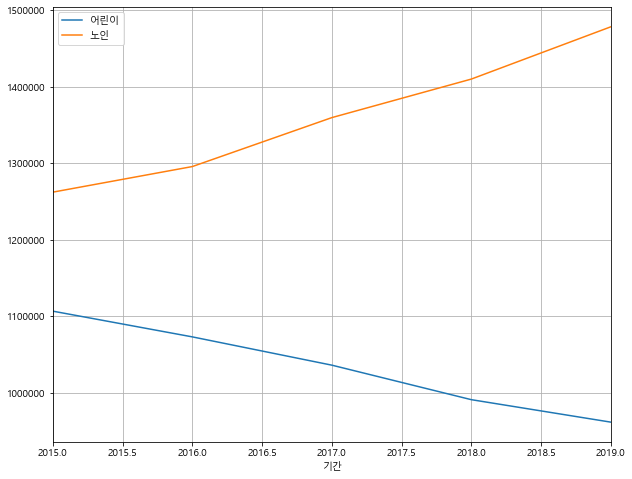

In [58]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

young_old.plot(figsize=(10,8),grid = True)

## 시설 1개당 대응 노인 수


In [59]:
nursing # 자치구별 요영사설 수
old_people_population # 구별 인구

,전체인구,65세이상 인구,노인비율
자치구,,,
종로구,161869,27519,0.170008
중구,136488,23275,0.170528
용산구,245185,38791,0.158211
성동구,308979,43947,0.142233
광진구,366972,47902,0.130533
동대문구,363023,59350,0.163488
중랑구,402024,65164,0.162090
성북구,454744,70850,0.155802
강북구,317695,60577,0.190677


In [60]:
data = pd.concat([nursing,old_people_population], axis = 1)
data

C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,전체인구,65세이상 인구,노인비율
강남구,11,550209,71025,0.129087
강동구,14,440390,63452,0.144081
강북구,16,317695,60577,0.190677
강서구,26,598273,84077,0.140533
관악구,14,517334,75194,0.145349
광진구,22,366972,47902,0.130533
구로구,15,439371,65779,0.149712
금천구,30,251820,37660,0.149551
노원구,18,537303,80923,0.150610
도봉구,33,335631,58714,0.174936


In [61]:
data['요양시설 대응 노인수'] = data['65세이상 인구']/data[0]
data

,0,전체인구,65세이상 인구,노인비율,요양시설 대응 노인수
강남구,11,550209,71025,0.129087,6456.818182
강동구,14,440390,63452,0.144081,4532.285714
강북구,16,317695,60577,0.190677,3786.062500
강서구,26,598273,84077,0.140533,3233.730769
관악구,14,517334,75194,0.145349,5371.000000
광진구,22,366972,47902,0.130533,2177.363636
구로구,15,439371,65779,0.149712,4385.266667
금천구,30,251820,37660,0.149551,1255.333333
노원구,18,537303,80923,0.150610,4495.722222
도봉구,33,335631,58714,0.174936,1779.212121


In [62]:
data1 = pd.concat([old_welfare_seoul,old_people_population], axis = 1)
data1

,복지시설,전체인구,65세이상 인구,노인비율
자치구,,,,
종로구,76,161869,27519,0.170008
중구,53,136488,23275,0.170528
용산구,111,245185,38791,0.158211
성동구,179,308979,43947,0.142233
광진구,108,366972,47902,0.130533
동대문구,152,363023,59350,0.163488
중랑구,142,402024,65164,0.162090
성북구,190,454744,70850,0.155802
강북구,117,317695,60577,0.190677


In [63]:
data1['복지시설 대응 노인수'] = data1['65세이상 인구']/data1['복지시설']
data1

,복지시설,전체인구,65세이상 인구,노인비율,복지시설 대응 노인수
자치구,,,,,
종로구,76,161869,27519,0.170008,362.092105
중구,53,136488,23275,0.170528,439.150943
용산구,111,245185,38791,0.158211,349.468468
성동구,179,308979,43947,0.142233,245.513966
광진구,108,366972,47902,0.130533,443.537037
동대문구,152,363023,59350,0.163488,390.460526
중랑구,142,402024,65164,0.162090,458.901408
성북구,190,454744,70850,0.155802,372.894737
강북구,117,317695,60577,0.190677,517.752137


### 구별 시설들이 대응해야할 노인 수

In [64]:
data2 = pd.concat([data1['복지시설 대응 노인수'],data['요양시설 대응 노인수'],data['65세이상 인구']], axis = 1)


C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [65]:
data2

,복지시설 대응 노인수,요양시설 대응 노인수,65세이상 인구
강남구,364.230769,6456.818182,71025
강동구,459.797101,4532.285714,63452
강북구,517.752137,3786.062500,60577
강서구,334.968127,3233.730769,84077
관악구,561.149254,5371.000000,75194
광진구,443.537037,2177.363636,47902
구로구,300.360731,4385.266667,65779
금천구,443.058824,1255.333333,37660
노원구,306.526515,4495.722222,80923
도봉구,394.053691,1779.212121,58714


In [66]:
data2['복지'] = data2['복지시설 대응 노인수']/data2['65세이상 인구']
data2['요양'] = data2['요양시설 대응 노인수']/data2['65세이상 인구']

In [67]:
data2

,복지시설 대응 노인수,요양시설 대응 노인수,65세이상 인구,복지,요양
강남구,364.230769,6456.818182,71025,0.005128,0.090909
강동구,459.797101,4532.285714,63452,0.007246,0.071429
강북구,517.752137,3786.062500,60577,0.008547,0.062500
강서구,334.968127,3233.730769,84077,0.003984,0.038462
관악구,561.149254,5371.000000,75194,0.007463,0.071429
광진구,443.537037,2177.363636,47902,0.009259,0.045455
구로구,300.360731,4385.266667,65779,0.004566,0.066667
금천구,443.058824,1255.333333,37660,0.011765,0.033333
노원구,306.526515,4495.722222,80923,0.003788,0.055556
도봉구,394.053691,1779.212121,58714,0.006711,0.030303


In [68]:
data3 = data2[['복지','요양']]

In [69]:
data3['복지'] = data3['복지']*100
data3['요양'] = data3['요양']*100

C:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
data2 = data2.astype({'복지시설 대응 노인수':int, '요양시설 대응 노인수':int})

In [71]:
onenursing = data2['요양시설 대응 노인수'].sort_values(ascending=False)

In [72]:
onewelfare = data2['복지시설 대응 노인수'].sort_values(ascending=False)

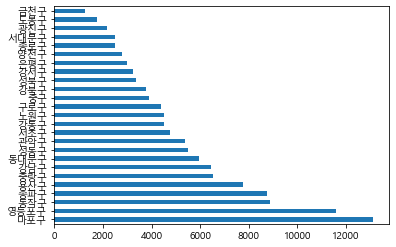

In [73]:
onenursing.plot(kind='barh')

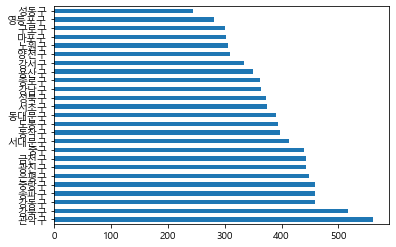

In [74]:
onewelfare.plot(kind='barh')

In [75]:
top5_nursing = onenursing.head(5)
top5_welfare = onewelfare.head(5)
low3_nursing = onenursing.tail(3)
low3_welfare = onewelfare.tail(3)

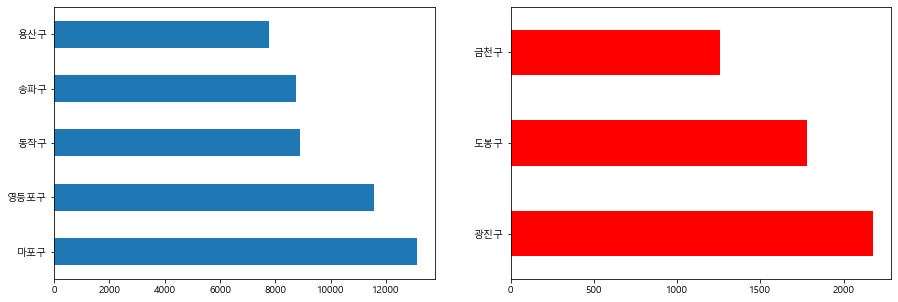

In [76]:
f, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
top5_nursing.plot(kind='barh')
plt.subplot(1,2,2)
low3_nursing.plot(kind='barh',color='r')

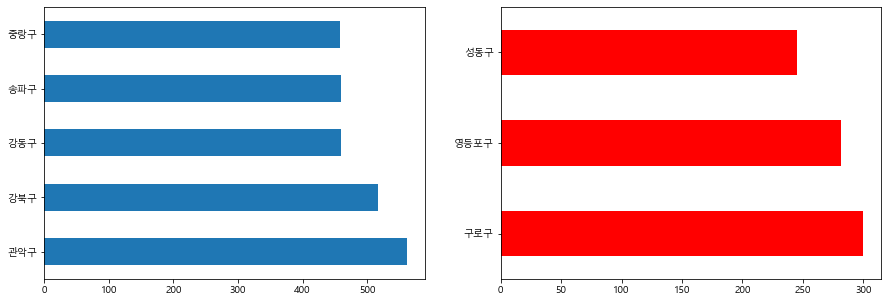

In [85]:
f, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
top5_welfare.plot(kind='barh')
plt.subplot(1,2,2)
low3_welfare.plot(kind='barh',color='r')

## 서울시 5년(2015~2019) 노인복지

In [88]:
nursing_origin = pd.read_csv('의료복지2015~2019.txt',sep='\t')

In [89]:
nursing_origin

,기간,자치구,합계,합계.1,합계.2,합계.3,노인요양시설,노인요양시설.1,노인요양시설.2,노인요양시설.3,노인요양 공동 생활가정,노인요양 공동 생활가정.1,노인요양 공동 생활가정.2,노인요양 공동 생활가정.3
0,기간,자치구,시설수,입소인원,입소인원,종사자수,시설수,입소인원,입소인원,종사자수,시설수,입소인원,입소인원,종사자수
1,기간,자치구,시설수,정원,현원,종사자수,시설수,정원,현원,종사자수,시설수,정원,현원,종사자수
2,2016,합계,526,"15,117","14,230","9,521",196,"12,219","11,449","7,538",330,"2,898","2,781","1,983"
3,2016,종로구,10,365,326,229,8,347,309,214,2,18,17,15
4,2016,중구,4,104,101,87,3,95,95,80,1,9,6,7
5,2016,용산구,6,218,211,150,3,192,187,131,3,26,24,19
6,2016,성동구,6,418,411,269,3,391,384,246,3,27,27,23
7,2016,광진구,21,708,627,420,10,609,538,360,11,99,89,60
8,2016,동대문구,24,493,491,327,5,322,321,212,19,171,170,115
9,2016,중랑구,42,946,925,587,7,631,615,381,35,315,310,206


In [90]:
nursing_2016_2019 = nursing_origin[['기간','자치구','합계']]

In [91]:
nursing_2016_2019.set_index('기간')

,자치구,합계
기간,,
기간,자치구,시설수
기간,자치구,시설수
2016,합계,526
2016,종로구,10
2016,중구,4
2016,용산구,6
2016,성동구,6
2016,광진구,21
2016,동대문구,24
